# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## White Noise

### Definition

[White noise](https://en.wikipedia.org/wiki/White_noise) is a wide-sense stationary (WSS) random signal with constant power spectral density (PSD)

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = N_0
\end{equation}

where $N_0$ denotes the power per frequency. White noise draws its name from the analogy to white light. It refers typically to an idealized model of a random signal, e.g. emerging from measurement noise. The auto-correlation function (ACF) of white noise can be derived by inverse discrete-time Fourier transformation (DTFT) of the PSD

\begin{equation}
\varphi_{xx}[\kappa] = \mathcal{F}_*^{-1} \{ N_0 \} = N_0 \cdot \delta[\kappa]
\end{equation}

This result implies that white noise has to be a zero-mean random process. It can be concluded from the ACF that two neighboring samples $k$ and $k+1$ are uncorrelated. Hence they show no dependencies in the statistical sense. Although this is often assumed, the probability density function (PDF) of white noise is not necessarily given by the normal distribution. In general, it is required to additionally state the amplitude distribution when denoting a signal as white noise.

### Example - Amplifier Noise

Additive white Gaussian noise (AWGN) is often used as a model for amplifier noise. In order to evaluate if this holds for a typical audio amplifier, the noise captured from a microphone preamplifier at full amplification with open connectors is analyzed statistically. For the remainder, a function is defined to estimate and plot the PDF and ACF of a given random signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


def estimate_plot_pdf_acf(x, nbins=50, acf_range=30):
    
    # compute and truncate ACF
    acf = 1/len(x) * np.correlate(x, x, mode='full')
    acf = acf[len(x)-acf_range-1:len(x)+acf_range-1]
    kappa = np.arange(-acf_range, acf_range)
    
    # plot PSD
    plt.figure(figsize = (10, 6))
    plt.subplot(121)
    plt.hist(x, nbins, density=True)
    plt.title('Estimated PDF')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\hat{p}_x(\theta)$')
    plt.grid()

    # plot ACF
    plt.subplot(122)
    plt.stem(kappa, acf, use_line_collection=True)
    plt.title('Estimated ACF')
    plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')
    plt.xlabel(r'$\kappa$')
    plt.axis([-acf_range, acf_range, 1.1*min(acf), 1.1*max(acf)]);
    plt.grid()

Now the pre-captured noise is loaded and analyzed

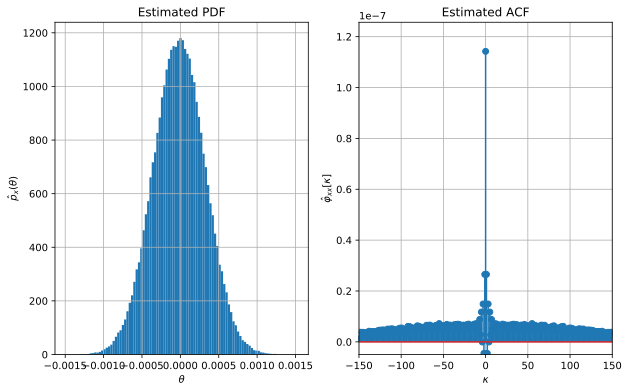

In [2]:
noise = np.load('../data/amplifier_noise.npz')['noise']
estimate_plot_pdf_acf(noise, nbins=100, acf_range=150)

Inspecting the PDF reveals that it fits quite well to a [normal distribution](important_distributions.ipynb#Normal-Distribution). The ACF consists of a pronounced peak. from which can be concluded that the samples are approximately uncorrelated. Hence, the amplifier noise can be modeled reasonably well as additive white Gaussian noise. In oder to estimate the parameters of the normal distribution, the captured samples are fitted to a normal distribution

In [3]:
mean, sigma = stats.norm.fit(noise)
print('Mean: {0:1.3e} \nVariance: {1:1.3e}'.format(mean, sigma**2))

Mean: -1.537e-05 
Variance: 1.140e-07


**Excercise**

* What relative level does the amplifier noise have when the maximum amplitude of the amplifier is assumed to be $\pm 1$?

Solution: The average power of a mean-free random signal is given by is variance, here $\sigma_\text{noise}^2$. Due to the very low mean in comparison to the maximum amplitude, the noise can be assumed to be mean-free. Hence, the relative level of the noise is then given as $10*\log_{10}\left( \frac{\sigma_\text{noise}^2}{1} \right)$. Numerical evaluation yields

In [4]:
print('Level of amplifier noise: {:2.2f} dB'.format(10*np.log10(sigma**2/1)))

Level of amplifier noise: -69.43 dB


### Example - Generation of White Noise with Different Amplitude Distributions

Toolboxes for numerical mathematics like `Numpy` or `scipy.stats` provide functions to draw uncorrelated random samples with a given amplitude distribution.

**Uniformly distributed white noise**

For samples drawn from a zero-mean random process with uniform amplitude distribution, the PDF and ACF are estimated as

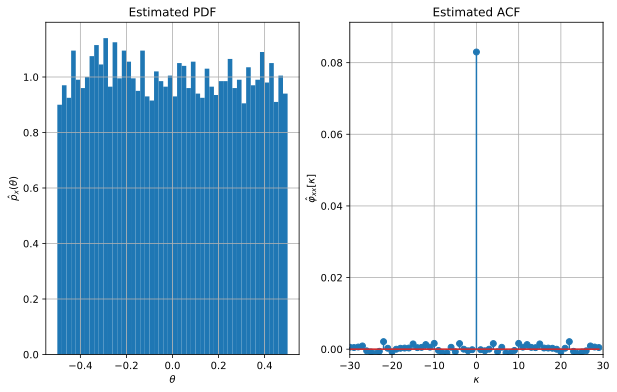

In [5]:
np.random.seed(3)
estimate_plot_pdf_acf(np.random.uniform(size=10000)-1/2)

Lets listen to uniformly distributed white noise

In [6]:
from scipy.io import wavfile
fs = 44100

x = np.random.uniform(size=5*fs)-1/2
wavfile.write('uniform_white_noise.wav', fs, np.int16(x*32768))

<audio src="./uniform_white_noise.wav" controls>Your browser does not support the audio element.</audio>[./uniform_white_noise.wav](./uniform_white_noise.wav)

**Laplace distributed white noise**

For samples drawn from a zero-mean random process with with Laplace amplitude distribution, the PDF and ACF are estimated as

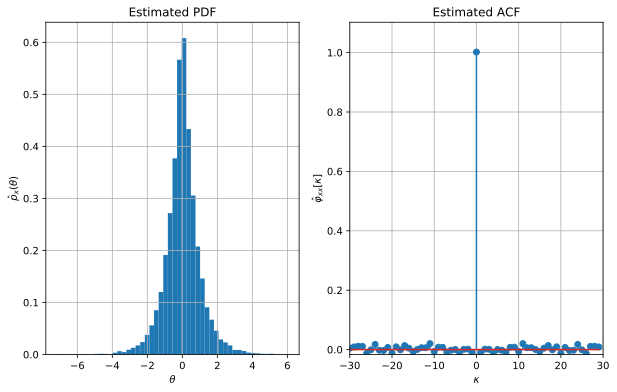

In [7]:
estimate_plot_pdf_acf(np.random.laplace(size=10000, loc=0, scale=1/np.sqrt(2)))

**Exercise**

* Do both random processes represent white noise?
* Estimate the power spectral density $N_0$ of both examples.
* How does the ACF change if you lower the length `size` of the random signal. Why?

Solution: Both processes represent white noise since the ACF can be approximated reasonably well as Dirac impulse $\delta[\kappa]$. The weight of the Dirac impulse is equal to $N_0$. In case of the uniformly distributed white noise $N_0 \approx \frac{1}{12}$, in case of the Laplace distributed white noise $N_0 \approx 1$. Decreasing the length `size` of the signal increases the statistical uncertainties in the estimate of the ACF.  

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.